In [141]:
import pandas as pd
import numpy
import json


## Préparer les données

In [142]:
with open('data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [143]:
data

[{'name': 'Tapis Oval Naturel\n',
  'text': [{'Dimensions ': ' 100x200 cm'},
   {'Matériaux ': 'Jute'},
   {'Poids net ': '4.100 grammes'}]},
 {'name': 'Commode Cube en bois durable Long. 100 cm\n',
  'text': [{'Matériaux': 'Placage bois de chêne FSC, Bois de chêne FSC'},
   {'Dimensions ': 'Larg. 100cm x Profond. 40cm x Haut. 70cm'},
   {'Poids ': '28kg'},
   {'Doit être assemblé ': 'Oui'},
   {'Origine ': 'Vietnam'},
   {'Garantie ': ' 2 ans'}]},
 {'name': 'Table à manger ronde en bois durable Ø115\n',
  'text': [{'Matériaux': 'Placage bois de chêne FSC,Bois de chêne FSC'},
   {'Dimensions ': 'Diam.115cm x Haut. 75cm'},
   {'Poids ': '22kg'},
   {'Doit être assemblé ': 'Oui'},
   {'Origine ': 'Vietnam'},
   {'Garantie ': ' 2 ans'}]},
 {'name': 'Table basse Acorn en bois durable Long.120 cm\n',
  'text': [{'Matériaux': 'Placage bois de chêne FSC,Bois de chêne FSC'},
   {'Dimensions ': 'Larg. 120cm x Profond. 57cm x Haut. 46cm'},
   {'Poids ': '13kg'},
   {'Doit être assemblé ': 'Oui'}

In [144]:
names = [item['name'].replace("\n","").lower() for item in data]

text_info = []
for item in data:
    text_dict = {}
    for text_item in item['text']:
        text_dict.update(text_item)
    text_info.append(text_dict)

In [146]:
cleaned_text = []
for item in text_info:
    item = {key.strip(): value for key, value in item.items()}
    cleaned_text.append(item)

In [148]:
df = pd.DataFrame({'name': names})
df = df.join(pd.DataFrame(cleaned_text))

In [221]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,name,Dimensions,Matériaux,Poids net,Poids,Doit être assemblé,Origine,Garantie,Conseils et entretien,Poids maximum sur l'étagère,Poids maximum sur le siège,Distance entre les étagères
0,Tapis Oval Naturel,100x200 cm,Jute,4.100 grammes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Commode Cube en bois durable Long. 100 cm,Larg. 100cm x Profond. 40cm x Haut. 70cm,"Placage bois de chêne FSC, Bois de chêne FSC",NaN,28.0,Oui,Vietnam,2 ans,NaN,NaN,NaN,NaN
2,Table à manger ronde en bois durable Ø115,Diam.115cm x Haut. 75cm,"Placage bois de chêne FSC,Bois de chêne FSC",NaN,22.0,Oui,Vietnam,2 ans,NaN,NaN,NaN,NaN
3,Table basse Acorn en bois durable Long.120 cm,Larg. 120cm x Profond. 57cm x Haut. 46cm,"Placage bois de chêne FSC,Bois de chêne FSC",NaN,13.0,Oui,Vietnam,2 ans,Utilisation en intérieur seulement,NaN,NaN,NaN
4,Petite bibliothèque en bois durable Long. 80 cm,Larg. 80cm x Profond. 45cm x Haut. 90cm,"Placage bois de chêne FSC,Bois de chêne FSC",NaN,18.0,Oui,Vietnam,2 ans,Utilisation en intérieur seulement.,7kg,NaN,NaN
5,Bureau d'architecte en bois durable Long. 120 cm,Larg. 120cm x Profond. 57cm x Haut. 75cm,"Placage bois de chêne FSC,Bois de chêne FSC",NaN,29.0,Oui,Vietnam,2 ans,NaN,NaN,NaN,NaN
6,Bureau Folk en bois durable Long. 120 cm,Larg. 120cm xProfond. 60cm x Haut. 77cm,"Placage bois de chêne FSC, Bois de chêne FSC",NaN,19.0,Oui,Vietnam,2 ans,NaN,NaN,NaN,NaN
7,Banc Ground en bois durable Long. 180 cm,Larg. 80cm x Profond. 40cm x Haut. 48cm,"Placage bois de chêne FSC,Bois de chêne FSC",NaN,20.0,Oui,Vietnam,2 ans,NaN,NaN,150kg,NaN
8,Grande bibliothèque en bois durable Long. 80 cm,Larg. 80cm x Profond. 45cm x Haut. 190cm,"Placage bois de chêne FSC, Bois de chêne FSC",NaN,25.0,Oui,Vietnam,2 ans,NaN,7kg,NaN,NaN
9,Table à manger Acorn 4 personnes en bois durab...,Larg. 140cm x Profond. 80cm x Haut. 74cm,"Placage bois de chêne FSC, Bois de chêne FSC",NaN,26.0,Oui,Vietnam,2 ans,NaN,NaN,NaN,NaN


## Visualisation des données

In [163]:
import matplotlib.pyplot as plt

In [215]:
material_list = df['Matériaux'].str.split(',').explode().str.strip().str.lower()

material_counts = material_list.value_counts().reset_index()
material_counts.columns = ['Material', 'Count']

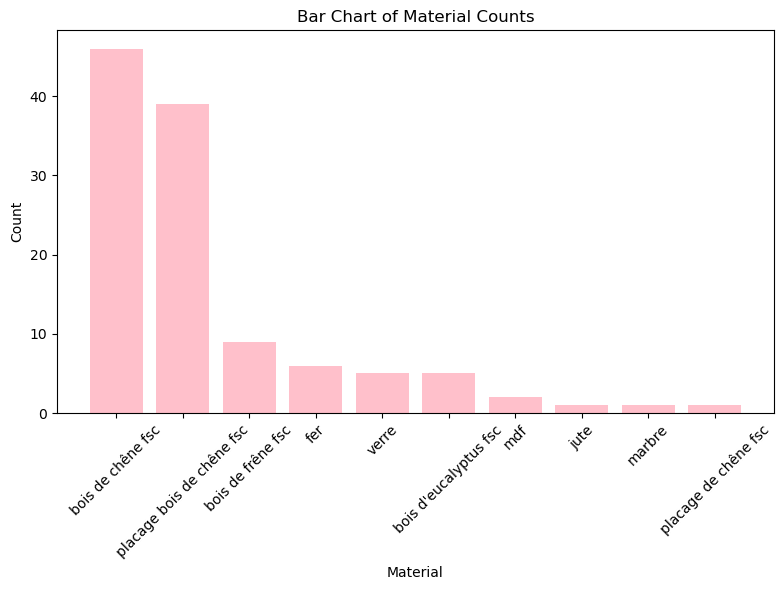

In [220]:
plt.figure(figsize=(8, 6))
plt.bar(material_counts['Material'],material_counts['Count'],color='pink')
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Bar Chart of Material Counts')

plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [162]:
origine_data = df.groupby(["Origine"]).count()
origine_data

,name,Dimensions,Matériaux,Poids net,Poids,Doit être assemblé,Garantie,Conseils et entretien,Poids maximum sur l'étagère,Poids maximum sur le siège,Distance entre les étagères
Origine,,,,,,,,,,,
Chine,13,13,13,0,13,13,13,4,6,0,0
Vietnam,46,46,45,0,46,46,46,10,15,2,7


In [173]:
origine_data["name"]

Origine
Chine      13
Vietnam    46
Name: name, dtype: int64

Text(0.5, 1.0, "la source et de l'origine")

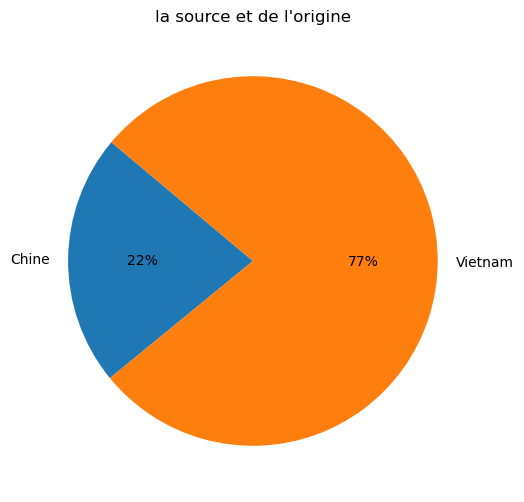

In [180]:
plt.figure(figsize=(6, 6))
plt.pie(origine_data["name"],labels=['Chine','Vietnam'] ,startangle=140, autopct='%1i%%')
plt.title('la source et de l\'origine')

In [181]:
assembled_data = df.groupby(["Doit être assemblé"]).count()

In [166]:
df['Poids'] = df['Poids'].str.replace('kg', '').replace(',', '.').apply(pd.to_numeric, errors='coerce')

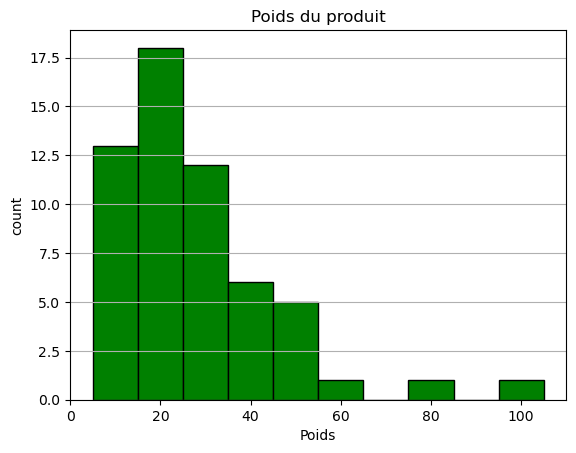

In [172]:
plt.hist(df['Poids'], bins=10, color='green', edgecolor='black')
plt.xlabel('Poids')
plt.ylabel('count')
plt.title('Poids du produit')
plt.grid(axis='y', alpha=1)

In [182]:
assembled_data["name"]

Doit être assemblé
Non    17
Oui    42
Name: name, dtype: int64

Text(0.5, 1.0, 'Doit être assemblé')

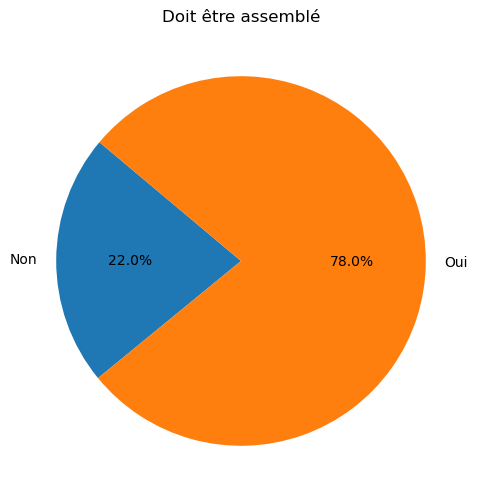

In [187]:
plt.figure(figsize=(6, 6))
plt.pie(origine_data["name"],labels=['Non','Oui'] ,startangle=140, autopct='%1.1f%%')
plt.title('Doit être assemblé')